In [6]:
import numpy as np
import matplotlib.pyplot as plt 

[[ 69   6 184  34]
 [ 14 156 216 167]
 [ 40  85 215 199]
 [ 30 218 198 152]]


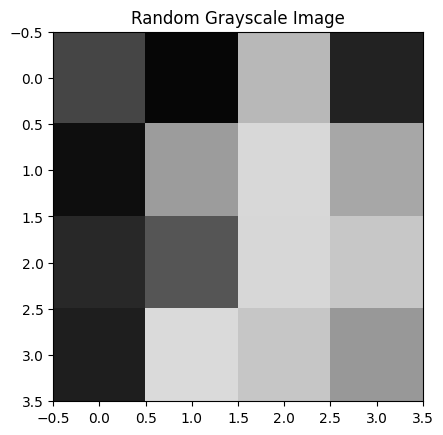

In [7]:
# Dimensions of the image
image_height = 4
image_width = 4

# Generate a random grayscale image
random_image = np.random.randint(0, 256, size=(image_height, image_width), dtype=np.uint8)
print(random_image)

# Display the random image using matplotlib
plt.imshow(random_image, cmap='gray', vmin=0, vmax=255)
plt.title('Random Grayscale Image')
plt.show()

In [8]:
numOfPixels = random_image.size
print(f"num of pixels: {numOfPixels}")

num of pixels: 16


In [12]:
noiseAmount = int(numOfPixels * 0.5)
print(f"noise amount: {noiseAmount}")

noise amount: 8


In [13]:
numOfSaltPixel = int(numOfPixels * 0.20)
print(f"salt: {numOfSaltPixel}")

salt: 3


In [14]:
numOfPepperPixel = int(numOfPixels * 0.30)
print(f"salt: {numOfPepperPixel}")

salt: 4


In [20]:
xCor, yCor = np.random.randint(0, (random_image.shape[0], random_image.shape[1]))
print(f"Cordinate: {xCor, yCor}")

Cordinate: (0, 1)


In [21]:
print(random_image.shape)

(4, 4)
